In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.renderers.enable('notebook')

df2013_2014 = pd.read_sas('DR1IFF_G.XPT')
df2014_2015 = pd.read_sas('DR1IFF_H.XPT')
df2015_2016 = pd.read_sas('DR1IFF_I.XPT')

In [3]:
#Drop of uninterested columns
df2013_2014 = df2013_2014.drop(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRDINT', 'DR1DBIH', 'DR1_020', 'DR1IFDCD'], axis=1)
df2014_2015 = df2014_2015.drop(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRDINT', 'DR1DBIH', 'DR1_020', 'DR1IFDCD'], axis=1)
df2015_2016 = df2015_2016.drop(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRDINT', 'DR1DBIH', 'DR1_020', 'DR1IFDCD'], axis=1)

#Filter the data by only looking at the non breast-fed infants
df2013_2014 = df2013_2014.query('DRABF == 2')
df2014_2015 = df2014_2015.query('DRABF == 2')
df2015_2016 = df2015_2016.query('DRABF == 2')


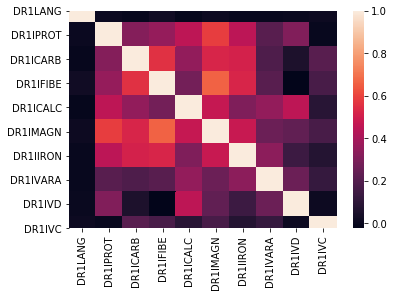

In [4]:
df_2013_2016 = pd.concat([df2013_2014[['DR1LANG','DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC']],\
 df2014_2015[['DR1LANG','DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC']], \
 df2015_2016[['DR1LANG','DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC']]], axis=0)
correlationdata = df_2013_2016[['DR1LANG','DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC']]
corr = correlationdata.corr(method='pearson')
sns.heatmap(corr)
plt.show()

In [5]:
#Breakfast 
df2013_2014_breakfast = df2013_2014.query('DR1_030Z == 1')
df2014_2015_breakfast = df2014_2015.query('DR1_030Z == 1')
df2015_2016_breakfast = df2015_2016.query('DR1_030Z == 1')

#Lunch
df2013_2014_lunch = df2013_2014.query('DR1_030Z == 2')
df2014_2015_lunch = df2014_2015.query('DR1_030Z == 2')
df2015_2016_lunch = df2015_2016.query('DR1_030Z == 2')

#Dinner
df2013_2014_dinner = df2013_2014.query('DR1_030Z == 3')
df2014_2015_dinner = df2014_2015.query('DR1_030Z == 3')
df2015_2016_dinner = df2015_2016.query('DR1_030Z == 3')

In [6]:
conda install -c conda-forge altair vega_datasets notebook vega


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
#Reference nutrients intake in the order of 'DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC'
ref = [50.5, 130, 28, 1114.285714, 370, 11.75, 800, 600, 79.375]

In [8]:
df2013_2014_breakfast_mean = df2013_2014_breakfast[['DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC']].mean()
df2014_2015_breakfast_mean = df2014_2015_breakfast[['DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC']].mean()
df2015_2016_breakfast_mean = df2015_2016_breakfast[['DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC']].mean()

df2013_2014_lunch_mean = df2013_2014_lunch[['DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC']].mean()
df2014_2015_lunch_mean = df2014_2015_lunch[['DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC']].mean()
df2015_2016_lunch_mean = df2015_2016_lunch[['DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC']].mean()

df2013_2014_dinner_mean = df2013_2014_dinner[['DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC']].mean()
df2014_2015_dinner_mean = df2014_2015_dinner[['DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC']].mean()
df2015_2016_dinner_mean = df2015_2016_dinner[['DR1IPROT','DR1ICARB','DR1IFIBE','DR1ICALC','DR1IMAGN','DR1IIRON','DR1IVARA','DR1IVD','DR1IVC']].mean()

In [9]:
frame1 = [df2013_2014_breakfast_mean, df2014_2015_breakfast_mean, df2015_2016_breakfast_mean]
result1 = pd.concat(frame1, axis=1, keys=['2013_2014', '2014_2015','2015_2016'])
result1['ref'] = ref
result1_new = result1.loc[:,:].div(result1['ref'], axis=0)


frame2 = [df2013_2014_lunch_mean, df2014_2015_lunch_mean, df2015_2016_lunch_mean]
result2 = pd.concat(frame2, axis=1, keys=['2013_2014', '2014_2015','2015_2016'])
result2['ref'] = ref
result2_new = result1.loc[:,:].div(result2['ref'], axis=0)

frame3 = [df2013_2014_dinner_mean, df2014_2015_dinner_mean, df2015_2016_dinner_mean]
result3 = pd.concat(frame3, axis=1, keys=['2013_2014', '2014_2015','2015_2016'])
result3['ref'] = ref
result3_new = result1.loc[:,:].div(result3['ref'], axis=0)

In [24]:
def prep_df(df, name):
    df = df.stack().reset_index()
    df.columns = ['Nutrient', 'Date', 'values']
    df['Meal'] = name
    return df

df_breakfast = prep_df(result1_new[['2013_2014', '2014_2015','2015_2016']], 'Breakfast')
df_lunch = prep_df(result2_new[['2013_2014', '2014_2015','2015_2016']], 'Lunch')
df_dinner = prep_df(result3_new[['2013_2014', '2014_2015','2015_2016']], 'Dinner')

dfcom = pd.concat([df_breakfast, df_lunch, df_dinner])
print(dfcom)

    Nutrient         c2    values       Meal
0   DR1IPROT  2013_2014  0.079526  Breakfast
1   DR1IPROT  2014_2015  0.078369  Breakfast
2   DR1IPROT  2015_2016  0.083698  Breakfast
3   DR1ICARB  2013_2014  0.124152  Breakfast
4   DR1ICARB  2014_2015  0.112947  Breakfast
..       ...        ...       ...        ...
22    DR1IVD  2014_2015  0.000964     Dinner
23    DR1IVD  2015_2016  0.001017     Dinner
24    DR1IVC  2013_2014  0.076892     Dinner
25    DR1IVC  2014_2015  0.070767     Dinner
26    DR1IVC  2015_2016  0.069471     Dinner

[81 rows x 4 columns]


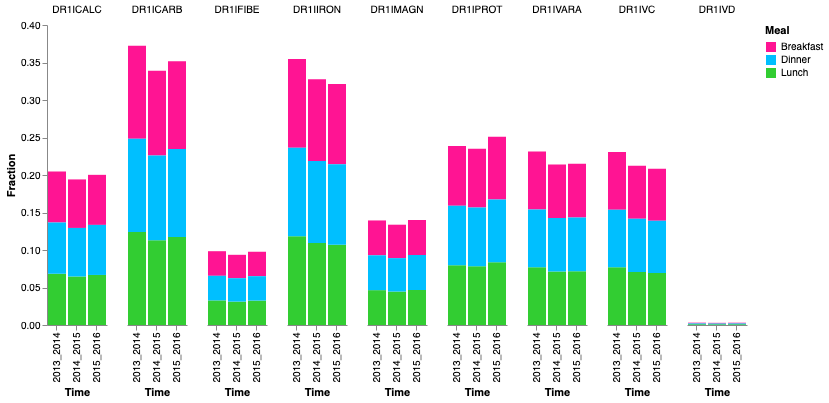

In [25]:
alt.Chart(dfcom).mark_bar().encode(
    x=alt.X('c2:N', title='Time'),
    y=alt.Y('sum(values):Q', axis=alt.Axis(grid=False,title='Fraction')),
    column=alt.Column('Nutrient:N', title=None),
    color=alt.Color('Meal:N',scale=alt.Scale(range=['#FF1493', '#00BFFF','#32CD32'],),)).configure_view(strokeOpacity=0)